<a href="https://colab.research.google.com/github/gisalgs/notebooks/blob/main/point-quadtree-colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Point Quadtrees

In k-D trees, we use the two coordinates alternatively. Now we see how to use the two coordinates simultaneously. In this way, we define a quadtree, where we divide the space into four quadrants (hence **quadt**ree) at each point going down the tree. we continue to partition the space into quads until each quad contains no more than 1 point. The points are inserted into the tree using a sequence defined by the user. For example, in the following example, we insert the points using the alphabetic order.

<img src="https://github.com/gisalgs/notebooks/blob/main/figures/quadtree1.png?raw=1" width=450/>

There are different kinds of quadtrees. The one we described in the above figure is called **point quadtree**: we index points using the coordinates of the points. Another type of quadtree for points is called **point region quadtree** where we partition the region as in region quadtrees. We can also use quadtree to index raster data, and data for lines and rectangles. [Hanan Samet](http://www.cs.umd.edu/~hjs/) and his colleagues at the University of Maryland used to maintain a [web site](http://donar.umiacs.umd.edu/quadtree/) that has an excellent collection of demos for quadtrees and k-D tree, but the site is no longer available after many years.

## Programming point quadtrees

We develop a specific class to store the node of a point quadtree. This node will have four child nodes, each named using the direction of the quadrant:

```python
class PQuadTreeNode():
    def __init__(self,point,nw=None,ne=None,se=None,sw=None):
        self.point = point
        self.nw = nw
        self.ne = ne
        self.se = se
        self.sw = sw
    def __repr__(self):
        return str(self.point)
    def is_leaf(self):
        return self.nw==None and self.ne==None and self.se==None and self.sw==None
```


We can also develop a similar strategy to go down the tree to search for information as we did for the generic binary tree and for k-D tree. Here we use a variable `q` for the node, `p` is the point to be found, and `is_find_only` specifies the purpose of search (again, find if point `p` is in the tree or which node should be the parent node if `p` is inserted into the tree). When `is_find_only` is `False`, we return the node that is the parent node of point `p` if it is to be inserted into the tree.

```python
def search_pqtree(q, p, is_find_only=True):
    if q is None:
        return
    if q.point == p:
        if is_find_only:
            return q
        else:
            return
    dx,dy = 0,0
    if p.x > q.point.x:
        dx = 1
    if p.y > q.point.y:
        dy = 1
    qnum = dx + dy*2
    child = [q.sw, q.se, q.nw, q.ne][qnum]
    if child is None and not is_find_only:
        return q
    return search_pqtree(child, p, is_find_only)
```

In the above function, we have a specific way of calculating the value of `qnum` so that we can get to the correct branch of node `q` by the line of `child = [q.sw, q.se, q.nw, q.ne][qnum]`. There is a question for this module about why the calculation of `qnum` will get us the correct answer.

## <font color="red">Question 1</font>

In the `search_pqtree` function, we have a line of code like this:

`child = [q.sw, q.se, q.nw, q.ne][qnum]`

where variable `qnum` is supposed to indicate which quadrant the search should go the next. Explain why the items in list must be listed in the order of `[q.sw, q.se, q.nw, q.ne]`. In order to correctly answer this question, please explain all the values `qnum` can be possibly assigned to.





```python
# TODO
#
#    Double click on this cell and write your answer below.
# The reason that the items must be listed in the order [q.sw, q.se, q.nw, q.ne] is because qnum will decide the position from the list that child will be
# set to. For example, if child is to go to the SW region, then qnum will be
# calculated to be 0 so child will be set to q.sw because
# [q.sw, q.se, q.nw, q.ne][qnum] = q.sw.
```


---

The function that inserts point `p` into a point quadtree `q` is listed below:

```python
def insert_pqtree(q, p):
    n = search_pqtree(q, p, False)
    node = PQuadTreeNode(point=p)
    if p.x < n.point.x and p.y < n.point.y:
        n.sw = node
    elif p.x < n.point.x and p.y >= n.point.y:
        n.nw = node
    elif p.x >= n.point.x and p.y < n.point.y:
        n.se = node
    else:
        n.ne = node
```

Again, as we did in the binary tree and k-D tree, we use the root node as a proxy to the entire tree because we always start from the root to use the tree.

And finally we can write a function that returns a point quadtree given a list of points in `data`:

```python
def pointquadtree(data):
    root = PQuadTreeNode(point = data[0])
    for p in data[1:]:
        insert_pqtree(root, p)
    return root
```

All the code listed above is stored at github in a file called [**pointquadtree1.py**](https://github.com/gisalgs/indexing/blob/master/pointquadtree1.py). Download it to the **indexing** folder and then we can test it using the following examples, or clone the

In [2]:
# This is only needed if the github repo hasn't been cloned
!git clone https://github.com/gisalgs/indexing.git
!git clone https://github.com/gisalgs/geom.git

Cloning into 'indexing'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 177 (delta 1), reused 0 (delta 0), pack-reused 170 (from 1)
Receiving objects: 100% (177/177), 58.96 KiB | 9.83 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Cloning into 'geom'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 372 (delta 26), reused 5 (delta 1), pack-reused 314 (from 1)
Receiving objects: 100% (372/372), 94.60 KiB | 13.51 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [3]:
from geom.point import *
from indexing.pointquadtree1 import *

data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13) ]
points = [Point(d[0], d[1]) for d in data1]
q = pointquadtree(points)
print([search_pqtree(q, p) for p in points])

[(2, 2), (0, 5), (8, 0), (9, 8), (7, 14), (13, 12), (14, 13)]


The function `pointquadtree` does not handle duplicated points in the input. The following is a test of this problem where an error will be thrown:

In [4]:
data2 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13), (0,5) ]
points2 = [Point(d[0], d[1]) for d in data2]
q = pointquadtree(points2)
print([search_pqtree(q, p) for p in points])

AttributeError: 'NoneType' object has no attribute 'point'

## <font color="red">Question 2</font>

As we can see from the above, the `pointquadtree` function doesn't work when the input list contains duplicated points. What can we do to make sure the function can finish without being interrupted? One way to handle this is to just skip any points that have already been included in the tree. The code for functions `insert_pqtree` and `pointquadtree` is already copied below, along with the code for test. You can change either of the two functions to answer this question.

In [5]:
# TODO
#
#    Change either function below so this code cell will not yield an exception.

def insert_pqtree(q, p):
    n = search_pqtree(q, p, False)
    if not n:
      return
    node = PQuadTreeNode(point=p)
    if p.x < n.point.x and p.y < n.point.y:
        n.sw = node
    elif p.x < n.point.x and p.y >= n.point.y:
        n.nw = node
    elif p.x >= n.point.x and p.y < n.point.y:
        n.se = node
    else:
        n.ne = node

def pointquadtree(data):
    root = PQuadTreeNode(point = data[0])
    for p in data[1:]:
        insert_pqtree(root, p)
    return root

data2 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13), (0,5) ]
points2 = [Point(d[0], d[1]) for d in data2]
q = pointquadtree(points2)
print([search_pqtree(q, p) for p in points])

[(2, 2), (0, 5), (8, 0), (9, 8), (7, 14), (13, 12), (14, 13)]


## Circular range querying point quadtrees

The circular range query using the point quadtree follows the same logic as the k-D tree. The only difference here is that we have four subtrees to consider instead of two.

```python
def range_query(t, p, r):
    def rquery(t, p, r, found):
        if t is None:
            return
        if p.x-r > t.point.x :
            rquery(t.ne, p, r, found)  # right points only
            rquery(t.se, p, r, found)
            return
        if p.y-r > t.point.y:
            rquery(t.ne, p, r, found)  # above points only
            rquery(t.nw, p, r, found)
            return
        if p.x+r < t.point.x:
            rquery(t.nw, p, r, found)  # left points only
            rquery(t.sw, p, r, found)
            return
        if p.y+r < t.point.y:
            rquery(t.se, p, r, found)  # below points only
            rquery(t.sw, p, r, found)
            return
        if p.distance(t.point) <= r:
            found.append(t.point)
        rquery(t.nw, p, r, found)
        rquery(t.ne, p, r, found)
        rquery(t.se, p, r, found)
        rquery(t.sw, p, r, found)
        return
    found = []
    if t is not None:
        rquery(t, p, r, found)
    return found
```

It should be noted that the above circular range query code can be improved so that we can identify cases when only one quadrant will be checked instead of always two currently implemented.

The code is available at github in a file called [**pointquadtree2.py**](https://github.com/gisalgs/indexing/blob/master/pointquadtree2.py). To install on a local computer, the module file must be put in the `indexing` folder after downloading. We use this function to test on the 7 data points as shown in the figure at the beginning of this tutorial.


In [9]:
from indexing.pointquadtree2 import *

data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13) ]
points = [Point(d[0], d[1]) for d in data1]
q = pointquadtree(points)
p = Point(5, 5)
r = 5
found = range_query(q, p, r)
print(found)

[[2, 2], [0, 5], [9, 8]]


Let's quickly draw the above example and see if the results make sense. We first define a few drawing functions that uses matplotlib.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def draw_points(pts, color, marker, size, alpha=0.7):
    axis = plt.scatter([p.x for p in pts], [p.y for p in pts],
                       marker=marker, color=color, s=size, alpha=alpha)
    return axis

def draw_circle(x, y, r):
    circle = plt.Circle((x, y), radius=r, color='r', fill=False)
    plt.gca().add_patch(circle)

def draw_lines(linesxy, color):
    frame = plt.gca()
    l = plt.Line2D(linesxy[0], linesxy[1], color=color)
    frame.add_line(l)

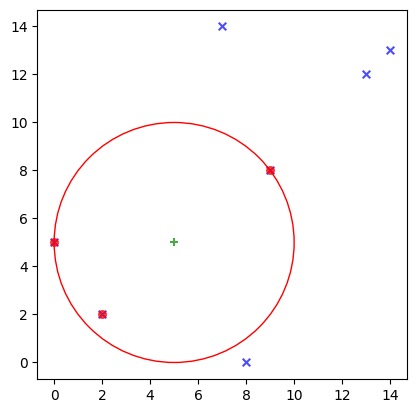

In [11]:
draw_points(points, 'blue', 'x', 30)
draw_points(found, 'red', 'o', 30)
draw_points([p], 'green', '+', 30)
draw_circle(p.x, p.y, 5)
plt.gca().set_aspect(1)
plt.show()

## <font color="red">Question 3</font>

A goal of any range query is to minimize the times when a point has to be tested if it is in the range or not. In circular range query, it is more critical to avoid unnecessary testing of a point in a circle by calculating the distance between the point and circle center, because calculating distance does take more time than other operations. In our first example of using function `range_query` on a point quadtree based on points `[(2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13)]` with a target point at `(5,5)` and a radius of 5, are there any points in the tree that are not tested by the line of `p.distance(t.point) <= r`? If so, what are those points and why they are not tested? To help answer the question, you can make some slight changes to the following code so the points being tested are printed out.

In [17]:
# TODO
#
#    (slightly) change the following code to answer the question.

def range_query(t, p, r):
    def rquery(t, p, r, found):
        if t is None:
            return
        if p.x-r > t.point.x :
            print('1:', t.point)
            rquery(t.ne, p, r, found)  # right points only
            rquery(t.se, p, r, found)
            return
        if p.y-r > t.point.y:
            print('2:', t.point)
            rquery(t.ne, p, r, found)  # above points only
            rquery(t.nw, p, r, found)
            return
        if p.x+r < t.point.x:
            print('3:', t.point)
            rquery(t.nw, p, r, found)  # left points only
            rquery(t.sw, p, r, found)
            return
        if p.y+r < t.point.y:
            print('4:', t.point)
            rquery(t.se, p, r, found)  # below points only
            rquery(t.sw, p, r, found)
            return
        if p.distance(t.point) <= r:
            print(t.point)
            found.append(t.point)
        rquery(t.nw, p, r, found)
        rquery(t.ne, p, r, found)
        rquery(t.se, p, r, found)
        rquery(t.sw, p, r, found)
        return
    found = []
    if t is not None:
        rquery(t, p, r, found)
    return found

data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13) ]
points = [Point(d[0], d[1]) for d in data1]
q = pointquadtree(points)
p = Point(5, 5)
r = 5
found = range_query(q, p, r)
print('Found:', found)

(2, 2)
(0, 5)
(9, 8)
4: (7, 14)
3: (13, 12)
Found: [[2, 2], [0, 5], [9, 8]]


In [ ]:
# TODO:
#   What are the points that are not tested and why they are not tested? Put yrou answer here.

#The points that are not tested are (8,0), (7,14), (13,12), (14,13). The reason these points are not tested is because for (7,14), (13,12) the fourth and third boundary checks respectively are True,
#so only child nodes of those points are checked and the SE branch where (8, 0) is was never checked and the branch from (13, 12) where (14, 13) is stored is also never checked. So the points that
#do not reach the distance function either trigger earlier statements or they are never checked because the boundary checks rule them out as options for the range query.


---

Finally, we test a potentially tricky case: the input target point is closer to points in quads that do not contain the target point.

In [18]:
points2 = [Point(p[0], p[1]) for p in [[5,5], [10,10], [4,4], [4.5,6], [6,4.5] ]]
qt = pointquadtree(points2)
p = Point(7, 7)
r = 3
found2 = range_query(qt, p, r)
print(found2)
print(sorted([p.distance(x) for x in points2]))

(5, 5)
(4.5, 6)
(6, 4.5)
[[5, 5], [4.5, 6], [6, 4.5]]
[2.692582403567252, 2.692582403567252, 2.8284271247461903, 4.242640687119285, 4.242640687119285]


As expected, the above test does not have the farthest point (10,10) included, even the quad that contains point (10, 10) also contains the target point (7, 7). Note the root is (5,5).

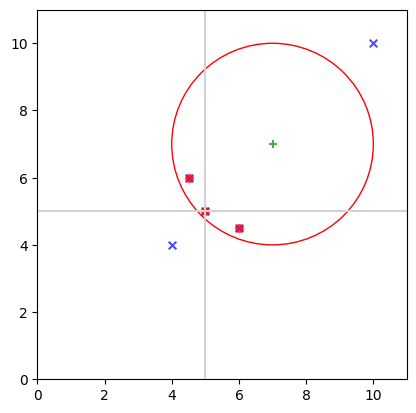

In [19]:
draw_points(points2, 'blue', 'x', 30)
draw_points(found2, 'red', 'o', 30)
draw_points([p], 'green', '+', 30)
draw_lines([[5,5], [0,11]], 'lightgrey')
draw_lines([[0,11], [5,5]], 'lightgrey')
draw_circle(p.x, p.y, r)
plt.axis('scaled')
ax = plt.gca()
ax.set_xlim([0, 11])
ax.set_ylim([0, 11])
ax.set_aspect(1)
plt.show()